# 期末レポート課題

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
eta = 0.1
max_iteration = 1000
x0 = -1.1
y0 = 1.1
x_pred = [x0]
y_pred = [y0]

In [2]:


def calc_f(x):
    """目的関数の計算

    Args:
        x (ndarray): 現在の変数xの値

    Returns:
        fx (float): 関数値f(x)
    """


    x, y = x
    fx = 0.26 * (x**2 + y**2) - 0.48*x*y

    return fx


def calc_grad(x):
    """勾配とそのノルムの計算

    Args:
        x (ndarray): 現在の変数xの値

    Returns:
        norm_grad (float): 勾配ベクトルのノルム
        grad (ndarray): 勾配ベクトル
    """

    #
    # 2. ここで, ２次元ベクトル"grad"に勾配を設定
    #
    x, y = x
    grad = np.array([
        0.52*x - 0.48*y,
        0.52*y - 0.48*x
    ])

    #
    # 2. 勾配のノルムの値を返り値で返す
    #
    # ヒント: 平方根を求める関数は np.sqrt(x) が利用可能
    # 参考: numpyにはノルムを求める関数も存在するのでわかる人はそちらを使っても良い

    norm_grad = np.linalg.norm(grad)

    return norm_grad, grad


def min_func(x):
    """最小化を行う関数

    Args:
        x (ndarray): xの初期値

    Returns:
        (ndarray): xの最適解
        (bool): 収束したかどうかのフラグ
        (ndarray): xの軌跡
        (ndarray): f(x)の軌跡
        (ndarray): ||g(x)||の軌跡
    """

    maxIter = 500  # 最大繰り返し
    tol = 0.01 # 停止条件
    alpha = 0.1  # 更新幅

    is_converged = False
    trajectory = []  # 最適化の過程を保存する変数
    trajectory_fx = []
    trajectory_norm_g = []

    for iter in range(maxIter):
        
        # 現在の解を保存（プロット用）
        trajectory.append(x)

        #
        # 1. 現在の目的関数の値を計算する
        #

        fx = calc_f(x)
        trajectory_fx.append(fx)

        #
        # 2. 現在の勾配を計算する
        #

        norm_g, g = calc_grad(x)
        trajectory_norm_g.append(norm_g)

        print("Iteration {}: f(x)={}, x={}, g={}, ||g||={}, ||x(t)-x(t-1)||={}".format(
            iter, fx, x, g, norm_g, np.linalg.norm(-alpha * g)
        ))

        #
        # 勾配のノルムが十分小さくなれば終了
        # 
        if norm_g < tol:
            is_converged = True
            print("勾配ベクトルのノルムがしきい値を下回りました．")
            break

        if (np.linalg.norm(-alpha * g) < 0.01):
            is_converged = True
            print("解の移動量がしきい値を下回りました．")
            break
        #
        # 3. xを更新する
        #
       
        x -=  alpha * g

    return x, is_converged, np.array(trajectory), \
        np.array(trajectory_fx), np.array(trajectory_norm_g)
  


# 初期解
x = np.array([3.0, 4.0])
print("initial solution:", x)

x, is_converged, trajectory, traj_fx, traj_norm_g = min_func(x)

# 最適解
print("最適解:", x)

initial solution: [3. 4.]
Iteration 0: f(x)=0.7400000000000002, x=[3. 4.], g=[-0.36  0.64], ||g||=0.7343023900274328, ||x(t)-x(t-1)||=0.07343023900274329
Iteration 1: f(x)=0.6885878400000012, x=[3.036 3.936], g=[-0.31056  0.58944], ||g||=0.6662484725686056, ||x(t)-x(t-1)||=0.06662484725686056
Iteration 2: f(x)=0.6462319146854396, x=[3.067056 3.877056], g=[-0.26611776  0.54388224], ||g||=0.6054969472877921, ||x(t)-x(t-1)||=0.06054969472877922
Iteration 3: f(x)=0.6112172246785912, x=[3.09366778 3.82266778], g=[-0.22617329  0.50282671], ||g||=0.5513520272695903, ||x(t)-x(t-1)||=0.05513520272695903
Iteration 4: f(x)=0.5821545750927575, x=[3.1162851 3.7723851], g=[-0.1902766  0.4658234], ||g||=0.5031864731959915, ||x(t)-x(t-1)||=0.050318647319599154
Iteration 5: f(x)=0.5579186730413772, x=[3.13531276 3.72580276], g=[-0.15802269  0.43246731], ||g||=0.4604336489564049, ||x(t)-x(t-1)||=0.04604336489564049
Iteration 6: f(x)=0.5375979866175049, x=[3.15111503 3.68255603], g=[-0.12904708  0.402393

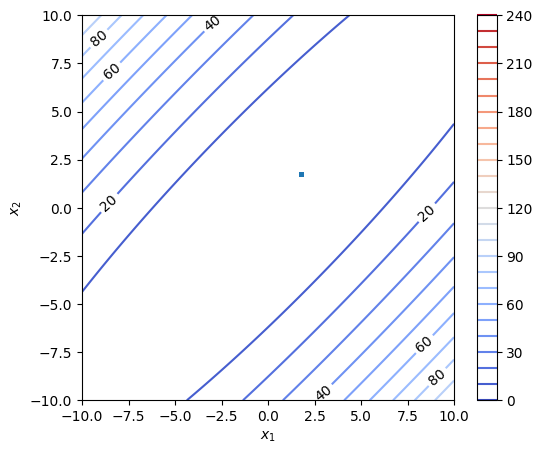

In [3]:
#
# 作図用．編集の必要なし．注意：calc_f()を作成しないとエラーが出ます
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

def visualize_f(trajectory):
    
    def f(x):
        return calc_f(x)

    fig, ax = plt.subplots(figsize=(6, 5))
    plt.scatter(trajectory[:, 0], trajectory[:, 1], lw=1, s=5)
    plt.plot(trajectory[:, 0], trajectory[:, 1], lw=1)

    # set plot range
    x_min = -10
    x_max = +10
    y_min = -10
    y_max = +10
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
       
    # make a grid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] 
    # evaluate f() at each point in the grid
    Z = np.array([f(x) for x in np.c_[XX.ravel(), YY.ravel()]])
    Z = Z.reshape(XX.shape) # reshape form 1D to 2D
    
    cs = plt.contour(XX, YY, Z, 
                    cmap='coolwarm',
                    levels=list(np.arange(0, 250, 10)),
                    )
    ax.clabel(cs, colors='k', fmt='%d',
              levels=list(np.arange(0, 250, 20)))
    plt.colorbar()

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


# 作図と保存

visualize_f(trajectory)


Text(0, 0.5, '$f(x)$')

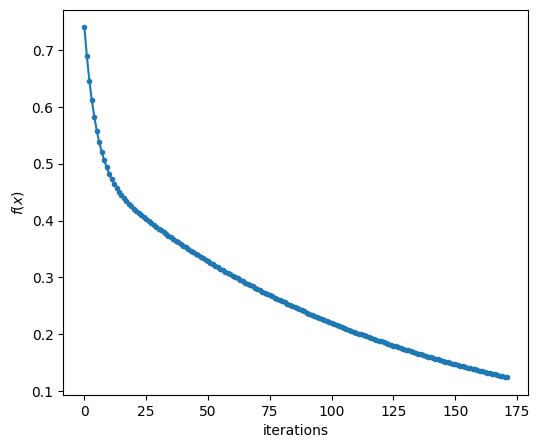

In [4]:
#
# 作図用．編集の必要なし．
#

fig, ax = plt.subplots(figsize=(6, 5))

plt.plot(traj_fx, '.-')
plt.xlabel('iterations')
plt.ylabel('$f(x)$')
# plt.yscale('log')  # 縦軸を対数スケールにする


Text(0, 0.5, '$||g(x)||$')

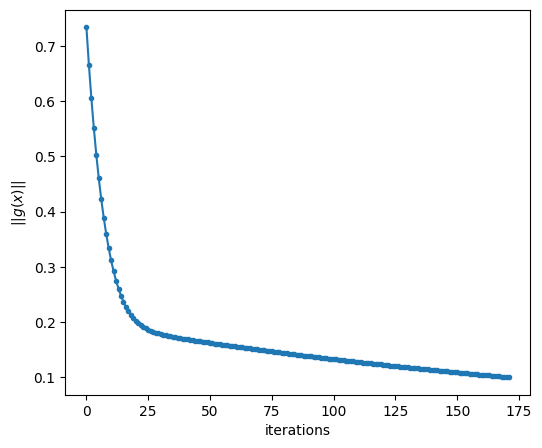

In [5]:
#
# 作図用．編集の必要なし．
#

fig, ax = plt.subplots(figsize=(6, 5))

plt.plot(traj_norm_g, '.-')
plt.xlabel('iterations')
plt.ylabel('$||g(x)||$')
# plt.yscale('log')  # 縦軸を対数スケールにする
